# **<font color="aqua">--== Clasificación de segmentación de clientes de automóviles ==--</font>**

* Fuente de los datos: [Kaggle - Analytics Vidhya hackathon](https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation?select=Test.csv)

## <font color="green">=== Descripción de los datos ===</font>

Una empresa de automóviles tiene planes de ingresar a nuevos mercados con sus productos existentes (P1, P2, P3, P4 y P5). Después de una intensa investigación de mercado, han deducido que el comportamiento del nuevo mercado es similar al mercado existente.

En su mercado existente, el equipo de ventas ha clasificado a todos los clientes en 4 segmentos (A, B, C, D). Luego, realizaron actividades de divulgación y comunicación segmentadas para un segmento diferente de clientes. Esta estrategia les ha funcionado excepcionalmente bien. Planean utilizar la misma estrategia para los nuevos mercados y han identificado 2627 nuevos clientes potenciales.

Metas:

* Analizar el grupo de clientes de la empresa. 
* Predecir el grupo correcto de nuevos clientes.

Diccionario de datos: 

Features  | Definition 
-------------------|------------------
ID       | Unique ID 
Gender       | Gender of the customer  
Ever_Married       | Marital status of the customer 
Age       | Age of the customer 
Graduated       | Is the customer a graduate? 
Profession       | Profession of the customer 
Work_Experience       | Work Experience in years
Spending_Score       | Spending score of the customer
Family_Size       | Number of family members for the customer 
Var_1	Anonymised       | Category for the customer 
Segmentation       | (target) Customer Segment of the customer


Tareas:

* Gender VS Segmentacion
* Estado civil vs Segmentacion
* Age vs Segmentacion
* Graduated vs Segmentacion
* Profession vs Segmentacion
* Work_experience vs Segmentacion
* Spending_scores vs Segmentacion
* Family_sizes vs Segmentacion
* Var_1 vs Segmentacion
* genero vs Age
* genero vs Profession
* Age vs Work_experience
* Age vs Spending_scores
* Var_1 vs Gender
* Spending_scores vs work_experience
* Gender vs Spending_scores

## <font color="green">===== Importar librerias =====</font> 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color="green">===== Carga de datos =====</font> 

In [ ]:
path = "Train.csv"
df = pd.read_csv(path)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.rename({'Ever_Married':'Marital_Status', 'Var_1':'Customer_Category'}, axis=1, inplace=True)


## <font color="green">===== Exploración y diagnóstico de la calidad de los datos =====</font> 

**<font color=#4863A0>Mostrar información general del dataset</font>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8068 non-null   int64  
 1   Gender             8068 non-null   object 
 2   Marital_Status     7928 non-null   object 
 3   Age                8068 non-null   int64  
 4   Graduated          7990 non-null   object 
 5   Profession         7944 non-null   object 
 6   Work_Experience    7239 non-null   float64
 7   Spending_Score     8068 non-null   object 
 8   Family_Size        7733 non-null   float64
 9   Customer_Category  7992 non-null   object 
 10  Segmentation       8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


* Se observa que hay tipos de datos que no corresponden como edad y tamaño de familia

**<font color=#4863A0>Mostrar resumen estadístico</font>**

In [ ]:
# Numéricos
df.describe(exclude=[object])

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
# Categóricos
df.describe(include=[object])

,Gender,Marital_Status,Graduated,Profession,Spending_Score,Customer_Category,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


**<font color=#4863A0>Visualizar la distribución de los datos</font>**

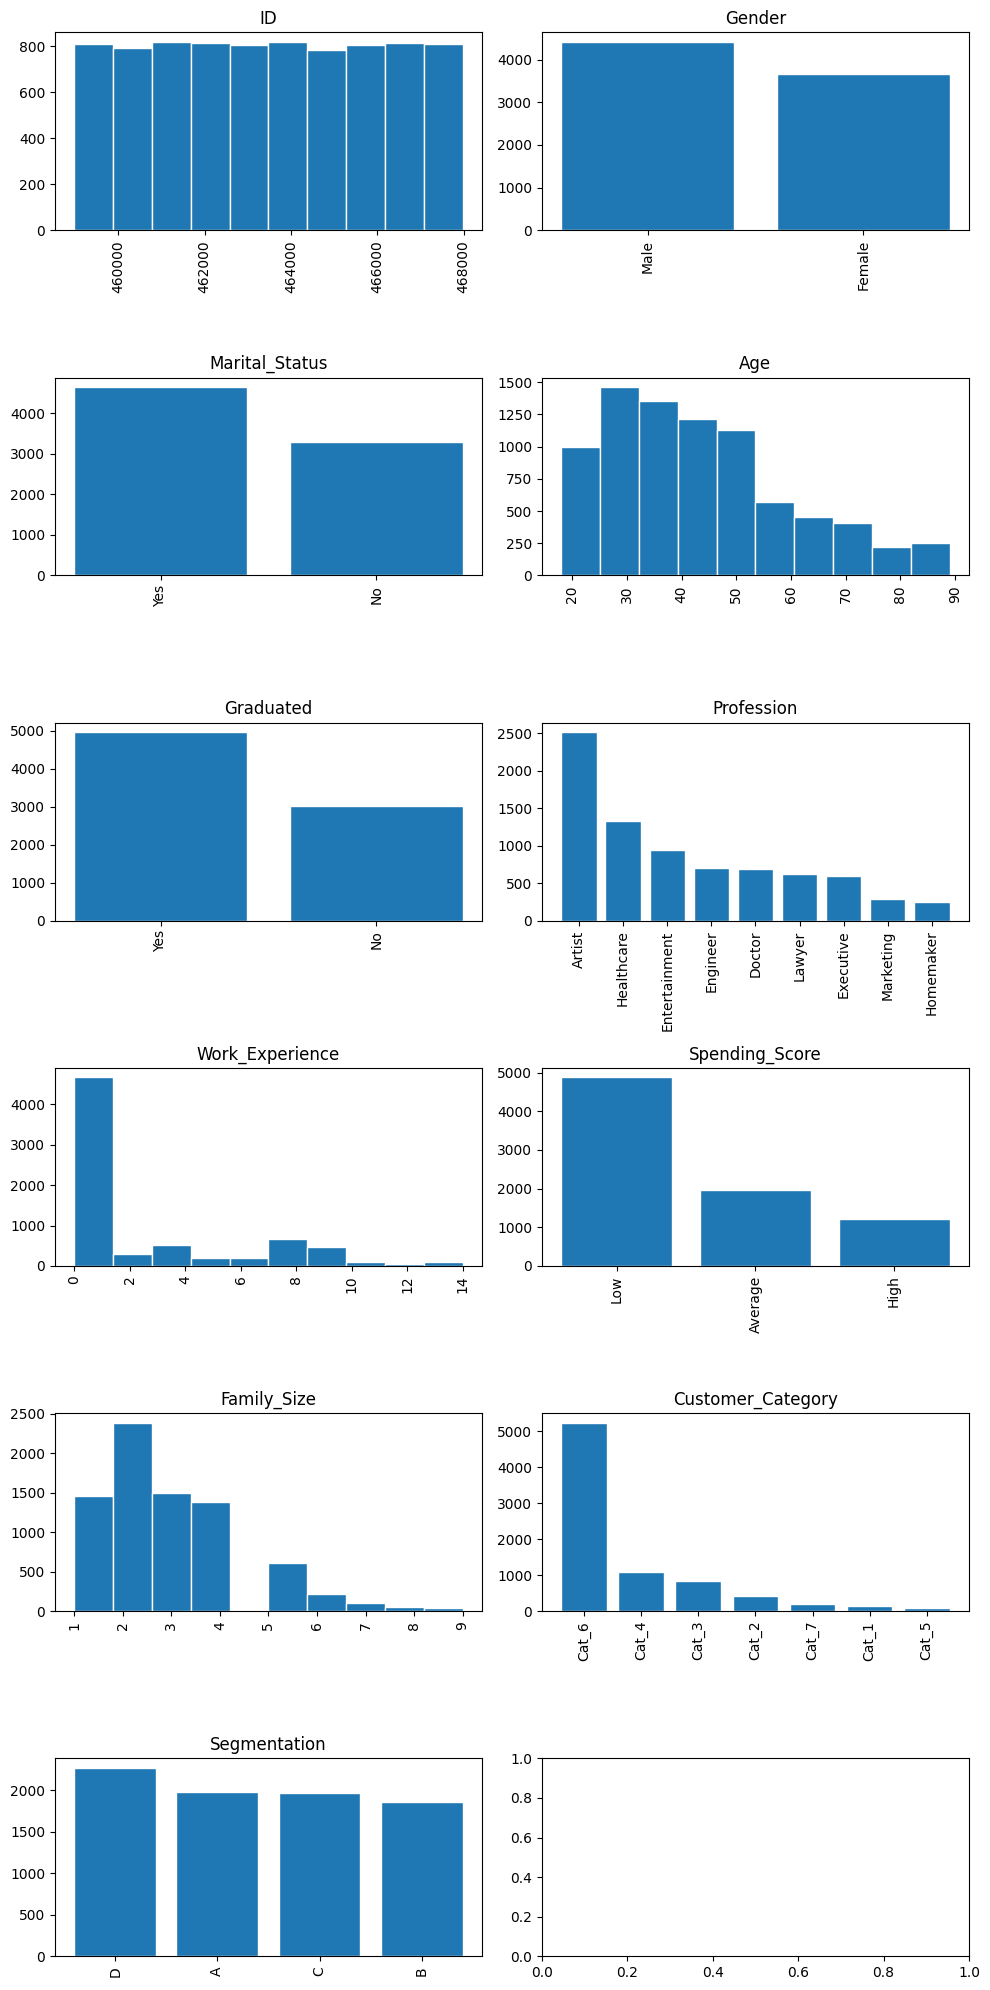

In [ ]:
columnas = df.columns

# Calcular el número de filas y columnas en la disposición de subplots
num_filas = 6
num_columnas = 2

# Crear la figura y los subplots
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(10, 20))

# Aplanar los subplots en un arreglo unidimensional
axs = axs.flatten()

# Iterar sobre las columnas y graficar los histogramas en los subplots correspondientes
for i, columna in enumerate(columnas):
    if df[columna].dtype == 'object':
        # Si es una columna categórica, contar las ocurrencias de cada categoría
        counts = df[columna].value_counts()
        axs[i].bar(counts.index, counts.values, edgecolor='white')
        axs[i].set_title(columna)
    else:
        # Si es una columna numérica, graficar el histograma
        axs[i].hist(df[columna], edgecolor='white')
        axs[i].set_title(columna)
    axs[i].tick_params(axis='x', rotation=90)
# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar la figura con los histogramas
plt.show()

* La edad y el tamaño de familia tienen una distribución asimetrica positiva.

**<font color=#4863A0></font>**

**<font color=#4863A0>Mostrar valores únicos por columnas</font>**

In [ ]:
# Verificar si existen datos inconsistentes o poco relevantes
for col_name in df.columns:
    print(f'{col_name}: ', df[f'{col_name}'].unique())
    print('='*30)

ID:  [462809 462643 466315 ... 465406 467299 461879]
Gender:  ['Male' 'Female']
Marital_Status:  ['No' 'Yes' nan]
Age:  [22 38 67 40 56 32 33 61 55 26 19 70 58 41 31 79 49 18 36 35 45 42 83 27
 28 47 29 57 76 25 72 48 74 59 39 51 30 63 52 60 68 86 50 43 80 37 46 69
 78 71 82 23 20 85 21 53 62 75 65 89 66 73 77 87 84 81 88]
Graduated:  ['No' 'Yes' nan]
Profession:  ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]
Work_Experience:  [ 1. nan  0.  4.  9. 12.  3. 13.  5.  8. 14.  7.  2.  6. 10. 11.]
Spending_Score:  ['Low' 'Average' 'High']
Family_Size:  [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
Customer_Category:  ['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Segmentation:  ['D' 'A' 'B' 'C']


* Se observa variables binarias, y presencia de datos faltantes.

**<font color=#4863A0>Identificar los missing values</font>**

<Axes: >

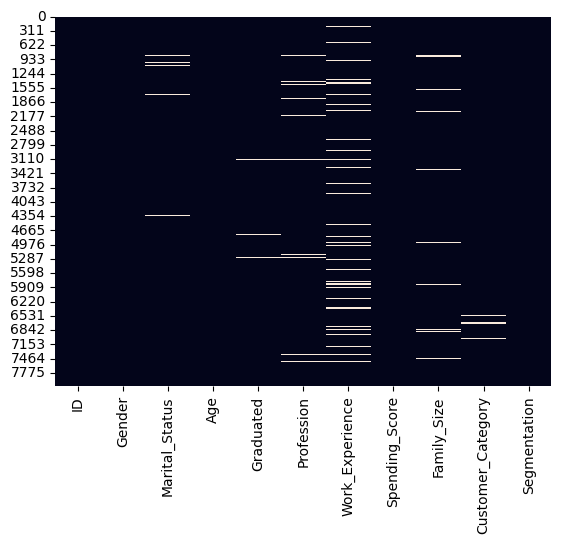

In [ ]:
# Visualmente
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Mostrar cantidad y porcentaje que representan los datos faltantes
df_nan = df.isnull().sum().to_frame()
porcentaje_nan = round((df.isnull().sum()/df.shape[0])*100,2).to_frame()
df_nan.rename({0:'count'}, axis=1,inplace=True)
porcentaje_nan.rename({0:'% nan'}, axis=1,inplace=True)
pd.concat([df_nan,porcentaje_nan],axis=1)

,count,% nan
ID,0,0.00
Gender,0,0.00
Marital_Status,140,1.74
Age,0,0.00
Graduated,78,0.97
Profession,124,1.54
Work_Experience,829,10.28
Spending_Score,0,0.00
Family_Size,335,4.15
Customer_Category,76,0.94


* Según algunos expertos, se recomienda eliminar los datos faltantes si son menores al 5%, caso contrario aplicar alguna técnica de imputación.
* La columna "Work_Experience" tiene un 10% de datos faltantes.

## <font color="green">===== Limpieza y tratamiento de los datos =====</font> 

**<font color=#4863A0>Eliminar columnas no relevantes</font>**

In [ ]:
df.drop('ID', axis=1, inplace=True)

**<font color=#4863A0>Imputación de datos faltantes</font>**

In [ ]:
# Tratamiento de datos nulos
from sklearn.impute import KNNImputer

# Obtener columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=[np.number]).columns
columnas_categoricas = df.select_dtypes(include=['object']).columns

# Realizar la imputación en columnas numéricas
imputer = KNNImputer(n_neighbors=5)
df_numericas_imputadas = pd.DataFrame(imputer.fit_transform(df[columnas_numericas]), columns=columnas_numericas)

# Combinar columnas numéricas imputadas con columnas categóricas originales
df_imputado = pd.concat([df[columnas_categoricas], df_numericas_imputadas], axis=1)

# Realizar la imputación en columnas categóricas
df = df_imputado.fillna(df_imputado.mode().iloc[0])

# Verificar la existencia de datos nulos
df.isnull().sum()

Gender               0
Marital_Status       0
Graduated            0
Profession           0
Spending_Score       0
Customer_Category    0
Segmentation         0
Age                  0
Work_Experience      0
Family_Size          0
dtype: int64

**<font color=#4863A0>Cambiar tipo de dato</font>**

In [ ]:
# Cambiar tipo de dato float a int
df['Age'] = df['Age'].astype('int64')
df['Family_Size'] = df['Family_Size'].astype('int64')
df.dtypes

Gender                object
Marital_Status        object
Graduated             object
Profession            object
Spending_Score        object
Customer_Category     object
Segmentation          object
Age                    int64
Work_Experience      float64
Family_Size            int64
dtype: object

## <font color="green">===== Análisis de los datos =====</font> 

**<font color=#4863A0>Porcentaje de clientes por categorias</font>**

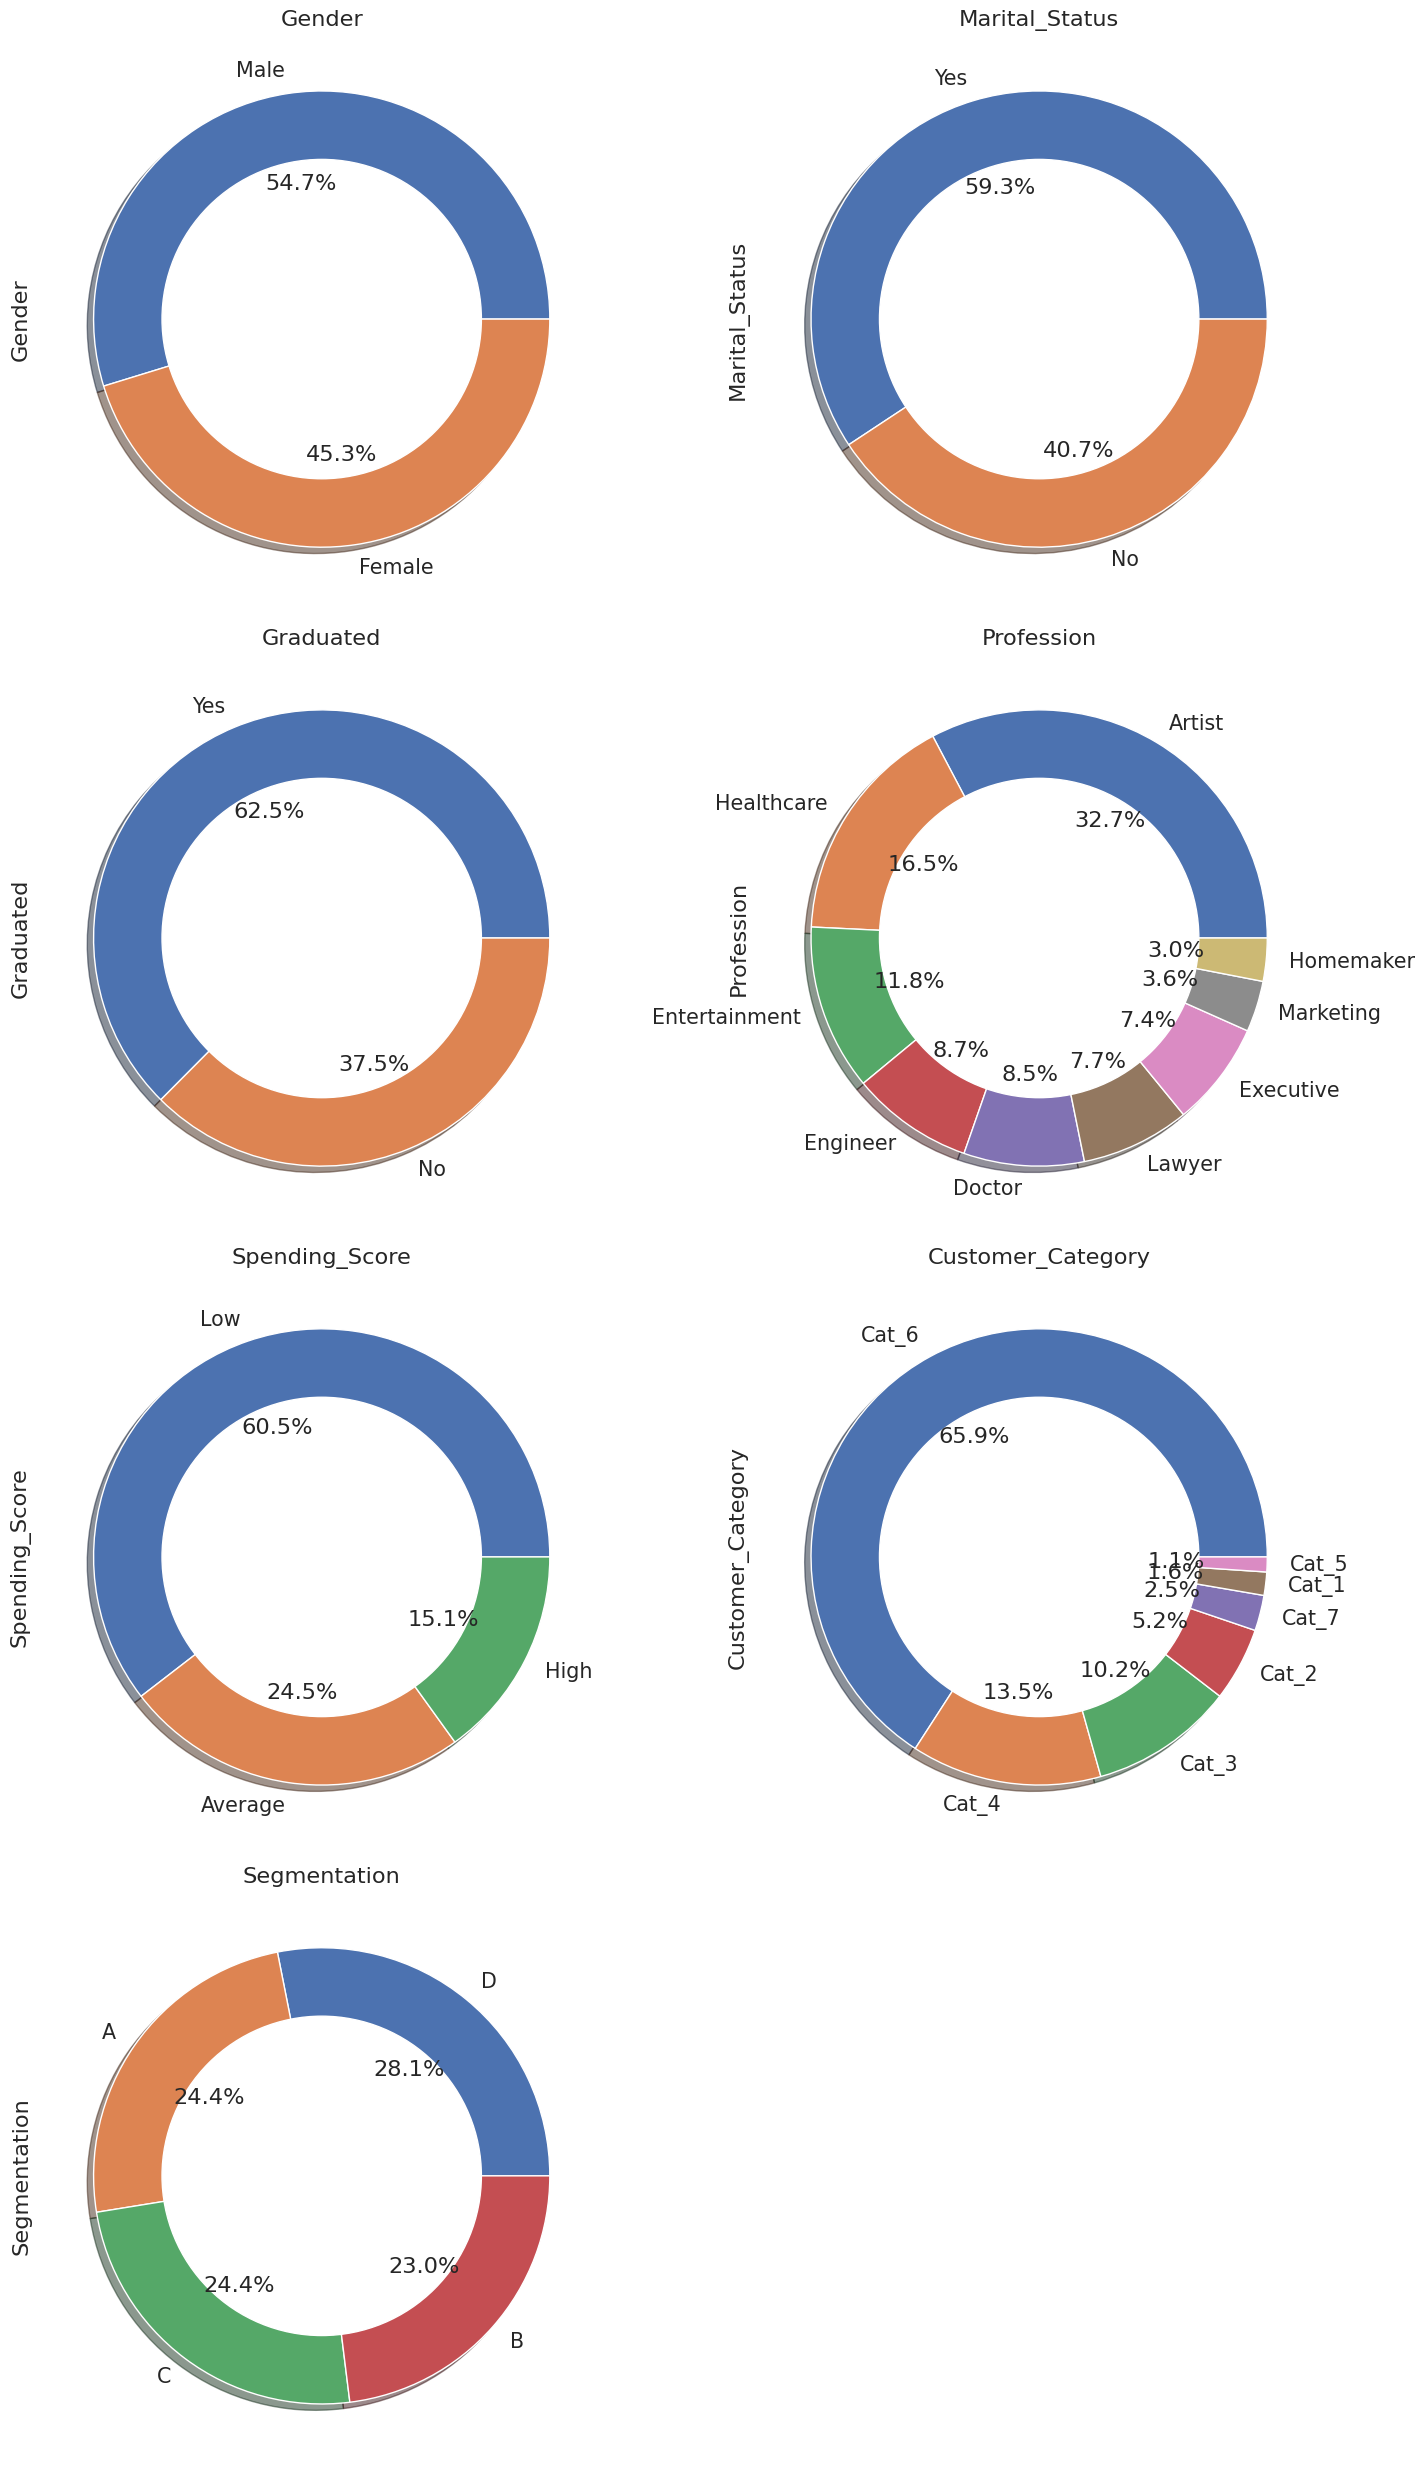

In [ ]:
cat_vars = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15,25))

for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    df[var].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = True)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(var)

plt.tight_layout()
plt.show()

* La mayoria de los clientes son varones con un 54.7%
* El 59.3% de los clientes son casados
* El 62.5% de los clientes son graduados
* Más del 60% de los clientes son profesionales de la salud, artistas y entretenimiento
* EL 60% de los clientes tienen un score de gasto bajo
* Más del 60% de los clientes son de la categoría 6 y menos del 11% de los clientes pertenecen a las categorias 1,2,5 y 7

**<font color=#4863A0>Distribución y boxplot</font>**

In [ ]:
# Función para visualizar la distribucion de los datos y estadisticos
def show_distribution(var_data, colname):
    #from matplotlib import pyplot as plt

    # Obtener estadísticas
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Crear un figura para 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plotear el histograma 
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Agregar líneas para la media, la mediana y la moda
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plotear el boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Agregar título 
    fig.suptitle(f'{colname} Distribution')

    # Mostrar la figura
    fig.show()

Minimum:18.00
Mean:43.47
Median:40.00
Mode:35.00
Maximum:89.00



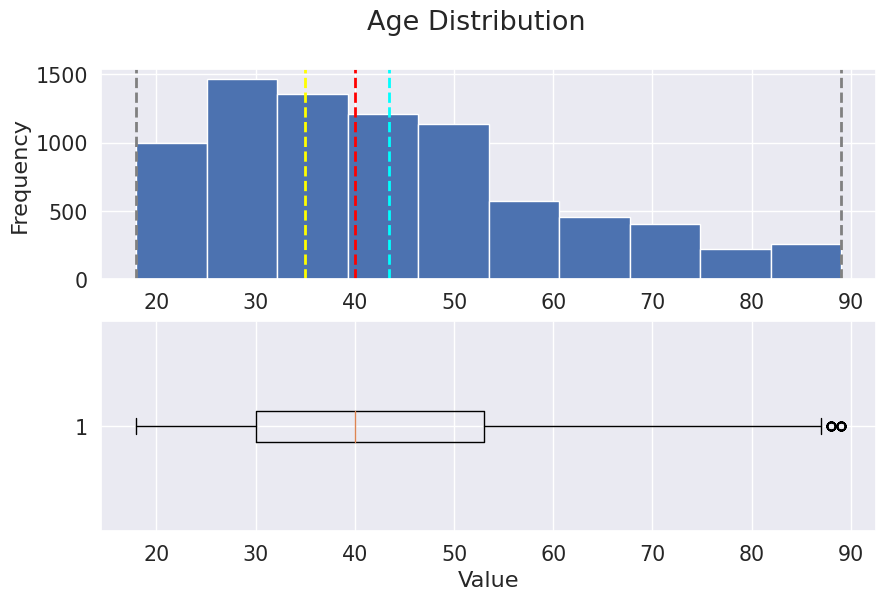

In [ ]:
show_distribution(df['Age'],'Age')

* Distribución asimetrica positiva
* La edad media de los clientes es de 43 años
* La mayoria de los clientes tienen entre 30 y 35 años
* También se observa la presencia de outliers

**<font color=#4863A0>Distribución y boxplot de la variable "Work_Experience"</font>**

Minimum:0.00
Mean:2.64
Median:1.00
Mode:1.00
Maximum:14.00



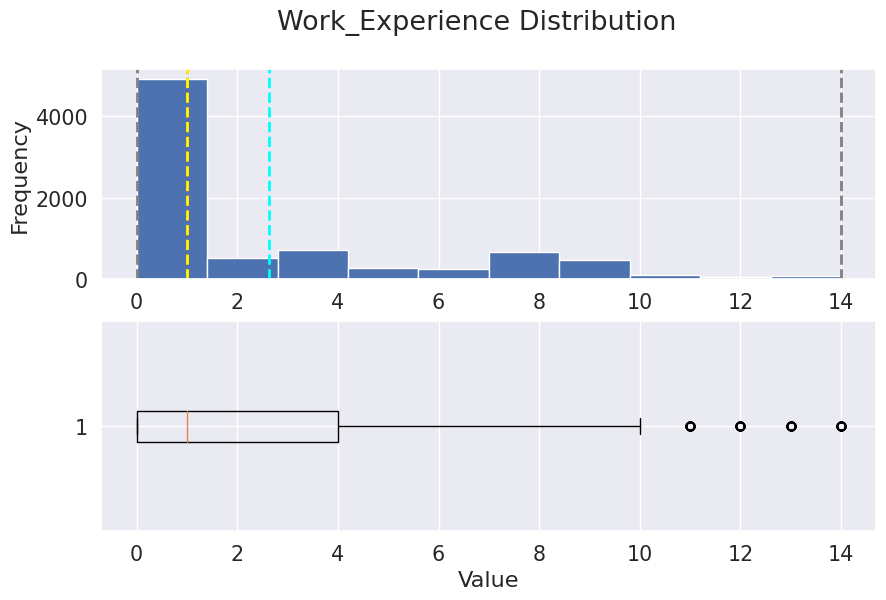

In [ ]:
show_distribution(df['Work_Experience'],'Work_Experience')

* Distribución no simétrica positiva
* La mayoria de los clientes tiene entre 1 a 2 años de experiencia.
* Sus clientes son personas que recien estan iniciando en el mundo laboral o juniors
* Se observa la presencia de outliers

**<font color=#4863A0>Distribución y boxplot de la variable "Family_Size"</font>**

Minimum:1.00
Mean:2.84
Median:3.00
Mode:2.00
Maximum:9.00



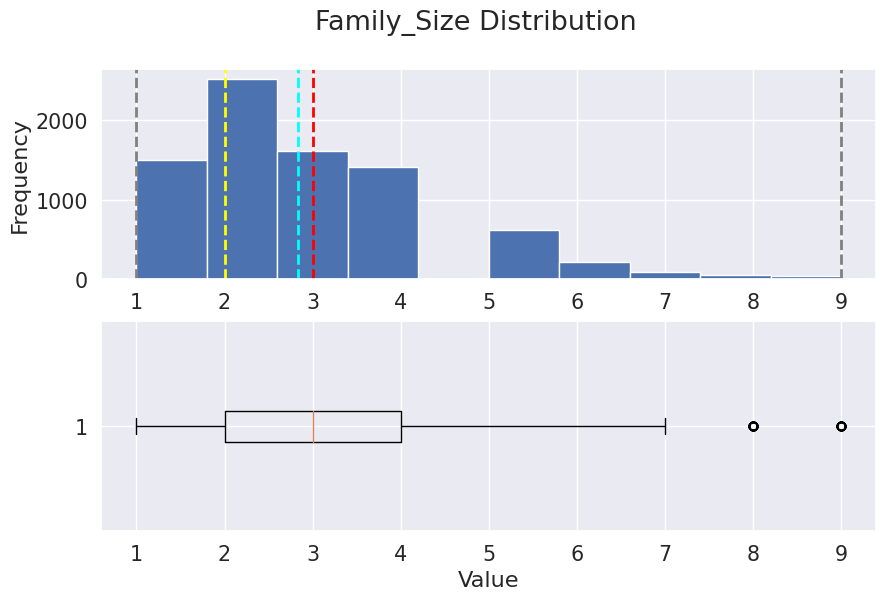

In [ ]:
show_distribution(df['Family_Size'],'Family_Size')

* Distribución asimetrica positiva
* La mayoria de los clientes tienen entre 2 a 3 hijos
* Presencia de outliers

# TASKS PART 1

**Genero vs Segmentación**

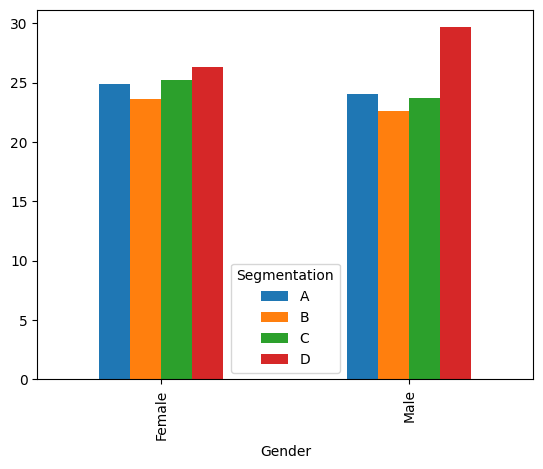

In [ ]:
plot = pd.crosstab(index = df["Gender"],
                   columns = df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                       axis=1).plot(kind = "bar")
# Se observa que las consumidoras estan posicionadas en una segmentación mas atractivas para  las empresas, en cambio los hombres estan liderando en la segmentacion D

**Estado civil VS Segmentacion**

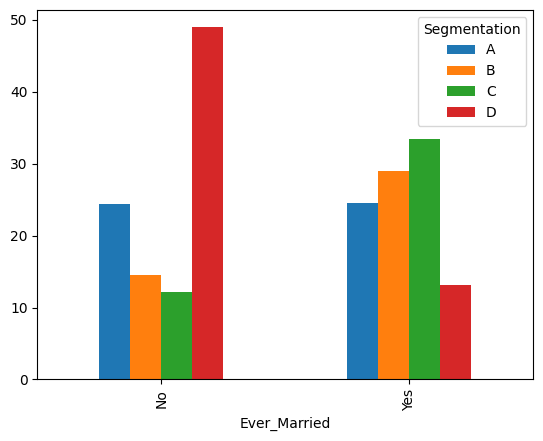

In [ ]:
plot = pd.crosstab(index = df["Ever_Married"],
                   columns = df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                       axis=1).plot(kind="bar")
# Se puede observar que la segmentación de las personas que alguna vez se casaron estan mejor posicionadas, tanto en el segmento B,C y D, sin embargo en la segmentación A esta igual.
# En cambio las personas que nunca se casaron se clasifican en el segmento menos atractivo para la empresa D, sin embargo tiene casi la misma cantidad del segmento A

**Age vs Segmentacion** 

<Axes: xlabel='Segmentation', ylabel='Age'>

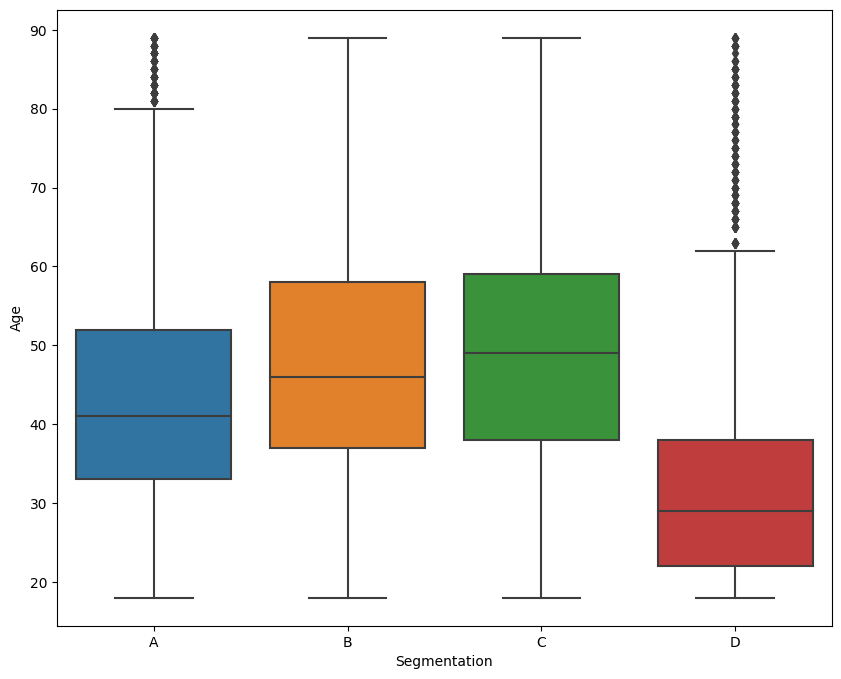

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df, x = "Segmentation", y = "Age")
# En la segmentacion D estan concentrados los consumidores más jovenes que estan dentro del rango 23 a 35 años, en cambio la segmentacion C y B comparten casi 
# la misma edad, por su parte en la segmentacion A  su rango de edad de los consumidores estan dentro de 32 a 53 años aprox 

**Graduated VS Segmentation**

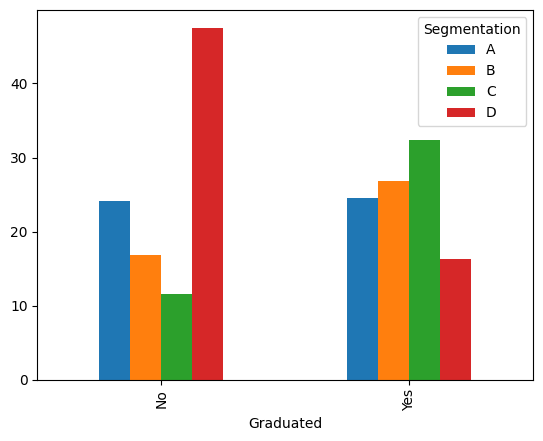

In [ ]:
plot = pd.crosstab(index = df["Graduated"],
                   columns = df["Segmentation"]).apply(lambda r:r/r.sum()*100,
                                                       axis = 1).plot(kind = "bar")
# La segmentacion D lideran las personas que no son graduadas, es decir que un consumidor no graduado es muy probable que este en este segmento, sin embargo 
# esto no determina que no este en el segmento A, ya que tanto la cantidad de clientes graduados y no  que estan en el segmento A son casi lo mismo, por otro lado , los no
# graduados son los que estan menos presentes en la segmentacion B y C 
# Los graduados estan mas equilibrados y son mas atractivos ya que estan mejor posicionados en la segmentaciones A, B  y C.

**Profession VS Segmentation**

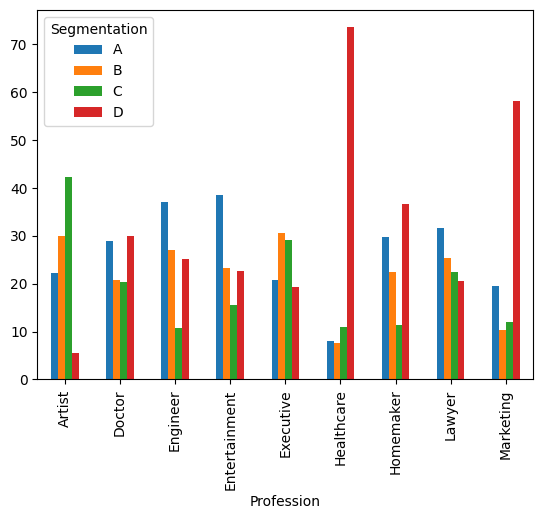

In [ ]:
                                                                                                                                                                            plot = pd.crosstab(index =df["Profession"],
                   columns =df["Segmentation"]).apply(lambda r: r/r.sum()*100,
                                                      axis = 1).plot(kind ="bar")

# Se observa que los consumidores más atractivos para la empresa tienen de profesion son ingenieros, entretenimiento,abogados, doctor y ama de casa
# sin embargo los consumidores que estan posicionados en la segmentacion D seria los de cuidado de salud, marketing, ama de casas

**Año de Experiencia VS Segmentation**

<Axes: xlabel='Segmentation', ylabel='Work_Experience'>

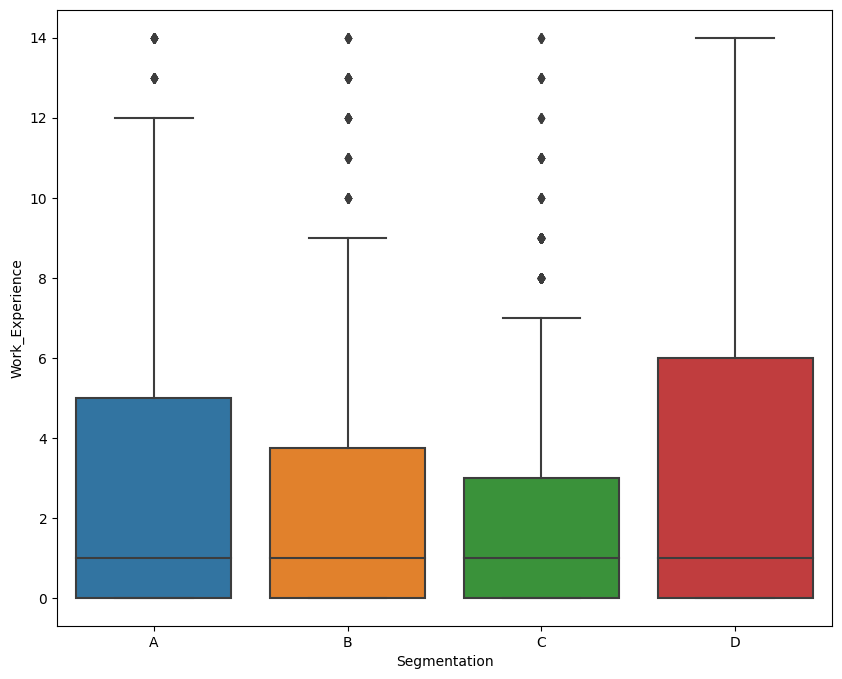

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x = "Segmentation", y = "Work_Experience")
# Los segmentos D son aquellos que tienen más años de experiencia por lo general que rondan desde 0 hasta los 6 
# sin embargo los de segmento C son los que tienen menos años de experiencia que es de 0 a 3 años
# Y los de segmentos B son aquellos que rondan 0 a 3 años
# Los de segmento A no necesariamente son aquellos que tienen más años de experiencia, ya que, los años 
# de experiencia de trabajo son de 0 a 5 años.

**Spending_score VS Segmentation**

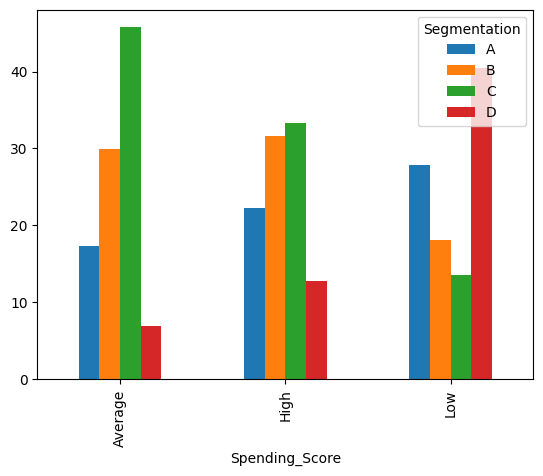

In [ ]:
plot = pd.crosstab(index = df["Spending_Score"],
                   columns = df["Segmentation"]).apply(lambda r:r/r.sum()*100,
                                                       axis= 1).plot(kind="bar")
# Se observa que los de bajo Spending lideran el segmento A pero a su vez tambien del SEgmento D, 
# por otra parte los de medio spending score son los clientes que lideran los segmentos D, sin embargo los
# alto spending score no lideran el segmento A pero si los segmentos B y C, siendo los más equilibrados.

**Family_sizes VS Segmentation**

<Axes: xlabel='Segmentation', ylabel='Family_Size'>

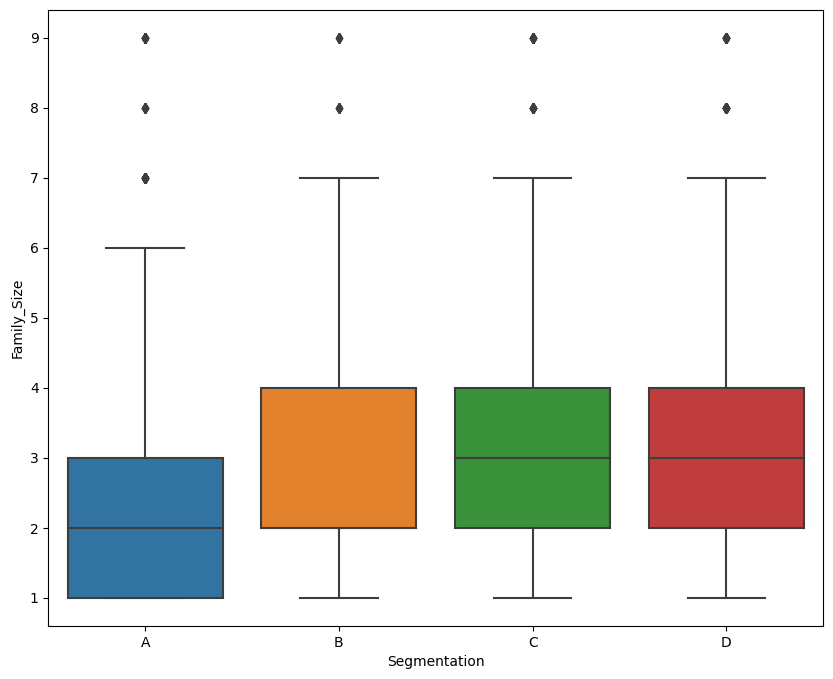

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df, x= "Segmentation", y = "Family_Size")
# Se puede observar que los consumidores que se encuentran en el segmento A por lo general son aquellos que las familias la conforman de 1 a 3 maximo, por otra parte los demas 
# segmentos son aquellas que en general estan conformados por 2 a 4 miembros.

# TASKS PART 2

**<font color=#4863A0>Tablas de contingencia </font>**

In [ ]:
# Customer_category vs Profession
CC_S=pd.crosstab(index=df['Profession'],
            columns=df['Customer_Category'], margins=True)
CC_S

Customer_Category,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,All
Profession,,,,,,,,
Artist,38,123,223,231,24,1931,70,2640
Doctor,11,43,78,105,4,421,26,688
Engineer,8,23,88,204,9,349,18,699
Entertainment,16,56,125,137,10,583,22,949
Executive,13,20,32,87,2,435,10,599
Healthcare,25,126,146,213,22,756,44,1332
Homemaker,4,13,48,28,6,146,1,246
Lawyer,10,8,29,36,3,536,1,623
Marketing,8,10,53,48,5,157,11,292


* La mayoria de clientes tienden a ubicarse en la categoria 6.
* Hay menor cantidad de clientes profesionales ubicados en las categorias 1,5 y 7

In [ ]:
# Profession vs Gender
pd.crosstab(index=df['Profession'],
            columns=df['Gender'], margins=True)

Gender,Female,Male,All
Profession,,,
Artist,1272,1368,2640
Doctor,304,384,688
Engineer,559,140,699
Entertainment,253,696,949
Executive,32,567,599
Healthcare,557,775,1332
Homemaker,203,43,246
Lawyer,307,316,623
Marketing,164,128,292


* Se tiene mayor cantidad de clientes ejecutivos varones que mujeres.
* Hay mayor cantidad de clientes mujeres amas de casa que varones
* Hay mayor presencia de clientes de ingeniería que varones.

In [ ]:
pd.crosstab(index=df['Gender'],
            columns=df['Customer_Category'], margins=True)

Customer_Category,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,All
Gender,,,,,,,,
Female,68,204,386,508,52,2333,100,3651
Male,65,218,436,581,33,2981,103,4417
All,133,422,822,1089,85,5314,203,8068


* Dado que la mayoria de clientes se encuentra en la categoria 6, esto puede indicar que puede haber algun beneficio o puede significar que son los que adquieren en cuotas.

In [ ]:
# porcentajes relativos según género
pd.crosstab(index=df['Gender'], columns=df['Spending_Score']
           ).apply(lambda r: r/r.sum() *100,
                                axis=1)

Spending_Score,Average,High,Low
Gender,,,
Female,22.760887,13.420981,63.818132
Male,25.877292,16.436495,57.686212


* Se observa que de todas las clientas, el 63.8% se encuentran con score de gasto bajo, lo cual podria significar que la mayoria tiende a ser mas cautelosa.
* Se observa que los varones tienden a gastar más que las mujeres.

In [ ]:
pd.crosstab(index=df['Family_Size'], columns=df['Spending_Score'],
            margins=True).apply(lambda r: r/len(df) *100, axis=1)

Spending_Score,Average,High,Low,All
Family_Size,,,,
1,0.136341,0.322261,18.071393,18.529995
2,10.225583,7.411998,13.559742,31.197323
3,5.751116,2.900347,11.341101,19.992563
4,5.391671,2.664849,9.506693,17.563213
5,2.045117,1.103123,4.586019,7.734259
6,0.582548,0.309866,1.735250,2.627665
7,0.173525,0.148736,0.867625,1.189886
8,0.074368,0.074368,0.470997,0.619732
9,0.086763,0.136341,0.322261,0.545364


* Los clientes con score de gasto alto, esta conformado por parejas.
* Los clientes con score bajo lo conforman los que son solteros esto puede ser debido a los pocos años de experiencia o ingreso.

**<font color=#4863A0>Graficas de boxplot </font>**

<Axes: title={'center': 'Age'}, xlabel='Gender'>

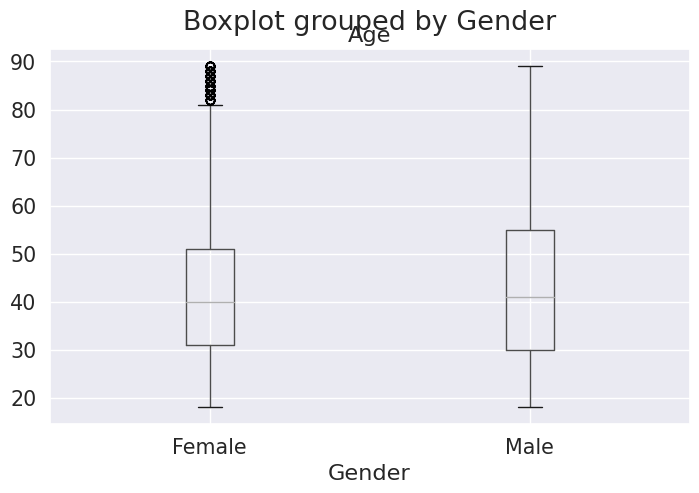

In [ ]:
# Age vs gender
df.boxplot(column='Age', by='Gender', figsize=(8,5))

* Los clientes varones se encuentran entre los 20 a 90 años y las mujeres entre los 20 a 80 años.

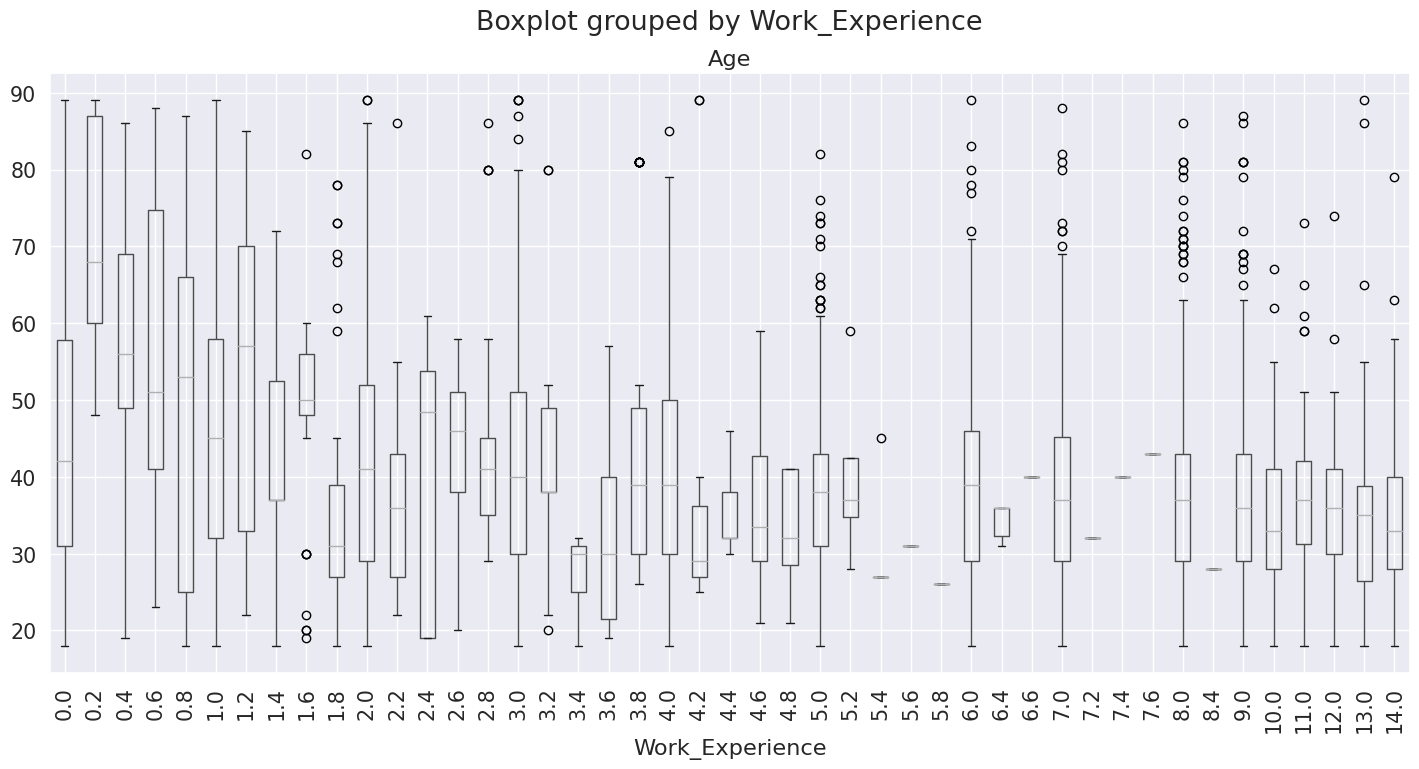

In [ ]:
df.boxplot(column='Age', by='Work_Experience', figsize=(17,8))
plt.tick_params(axis='x', rotation=90)

* Se observa que hay clientes entre 50 y 90 años que poseen 2 años de experiencia.
* Muchos de los clientes entre 30 a 45 años tienen entre 2 a 14 años de experiencia, esto puede deberse a que iniciaron a muy temprana edad a trabajar.

<Axes: title={'center': 'Age'}, xlabel='Spending_Score'>

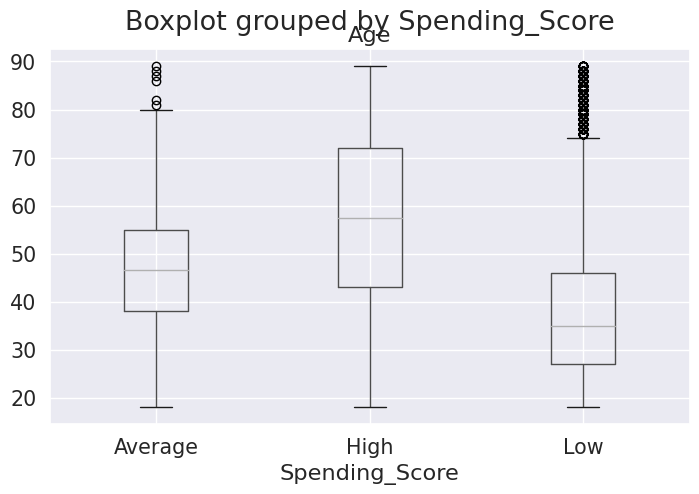

In [ ]:
df.boxplot(column='Age', by='Spending_Score', figsize=(8,5))

* Los jovenes son los clientes que inmediatamente buscan un vehiculo pero no tienen mucho dinero para gastar.
* Las personas con edad entre 45 y 70 años son los que realizan gastos muy altos debido a que tienen ahorros o ingresos elevados
* Los de gasto moderaso se enuentran entre 37 a 55 años.

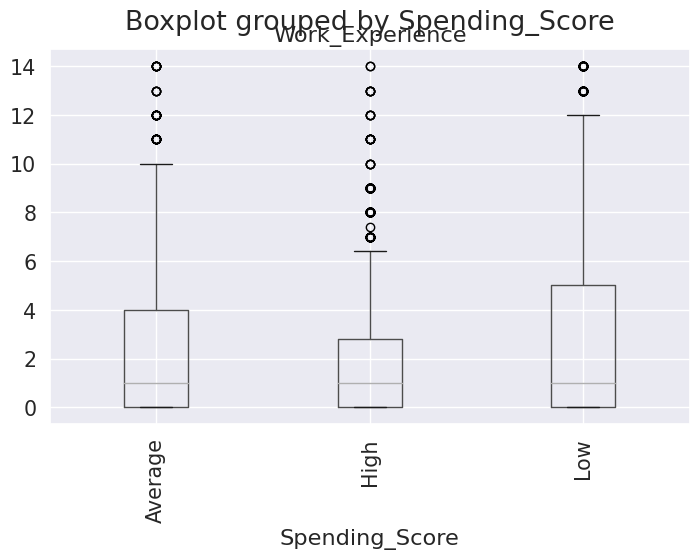

In [ ]:
df.boxplot(column='Work_Experience', by='Spending_Score', figsize=(8,5))
plt.tick_params(axis='x', rotation=90)

* Se observa que los que gastan más son las personas que tienen menos experiencia laboral.
* Los que poseen más años de experiencia suelen ser más cautelosos.

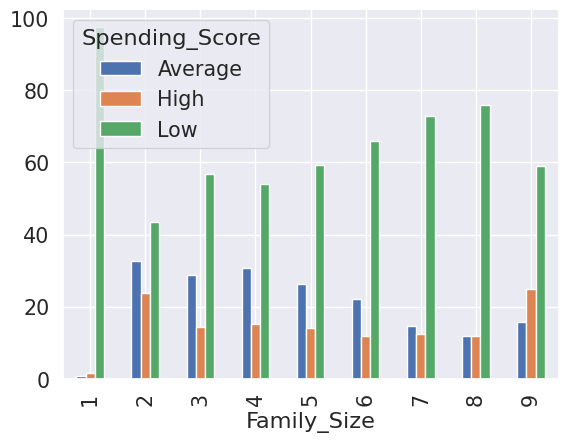

In [ ]:
# Gráfico de barras del porcentaje Family_Size segun Spending_Score
plot = pd.crosstab(index=df['Family_Size'],
            columns=df['Spending_Score']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

* A medida que incrementa el númerto de integrantes de una familia, el score de gatos 'bajo' incrementa o que los clientes de score alto y medio pasan a bajo.

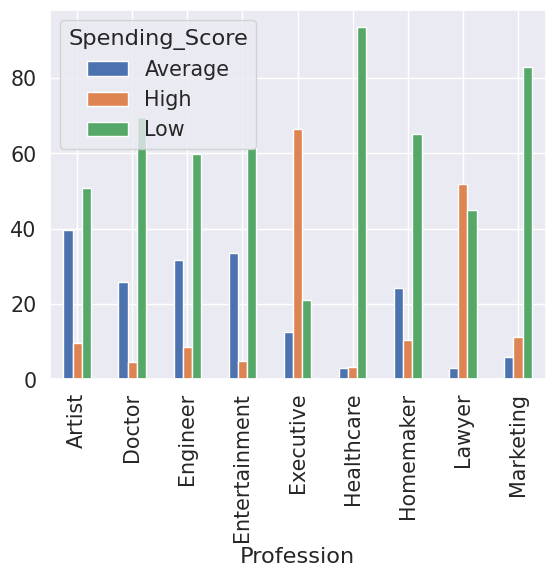

In [ ]:
# Gráfico de barras de Spending_Score segun Segmentation
plot = pd.crosstab(index=df['Profession'],
            columns=df['Spending_Score']).apply(lambda r: r/r.sum() *100,
                                              axis=1).plot(kind='bar')

* Se logra observar que los ejecutivos y abogados son los clientes que poseen los score de gasto mas altos, este factor puede ser por su estatus social, etc.

* Los profesionales de la salud son los clientes con un score muy bajo.

* Los artistas, profesionales de salud y los de entretenimiento si bien son una cantidad de clientes que supera el 50%, sin embargo, los ejecutivos y abogados son los clientes que mas gastan, por lo cual se debería de tener en cuenta este público objetivo.

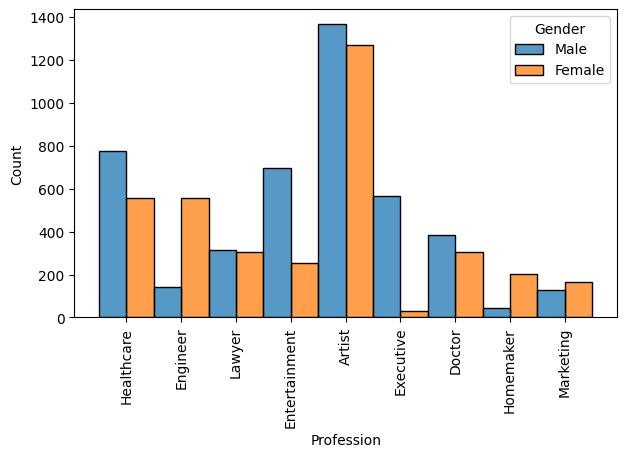

In [ ]:
#Distribucion de Profession by Gender
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs=sns.histplot(df, x='Profession',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* La mayoria de los clientes profesionales entre varones y mujeres son artistas.
* Hay mayor cantidad de clientes varones que pertenecen al entretenimiento

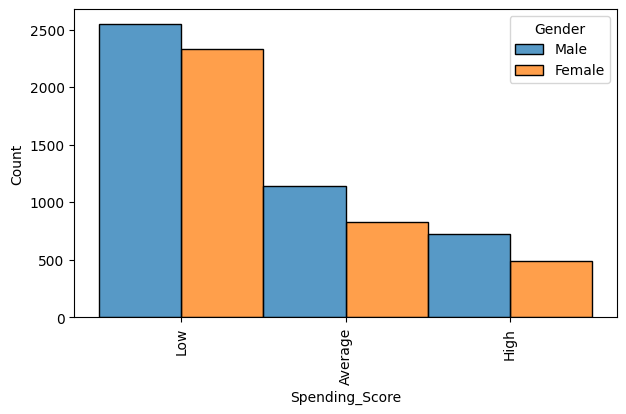

In [ ]:
#Distribution of Cat Variables w.r.t Gender
fig, axs = plt.subplots(1, 1, figsize=(7, 4))

axs=sns.histplot(df, x='Spending_Score',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* Se observa que los clientes que tienen un score de gasto alto son los varones
* Las mujeres son un poco más cautelosas con los gastos

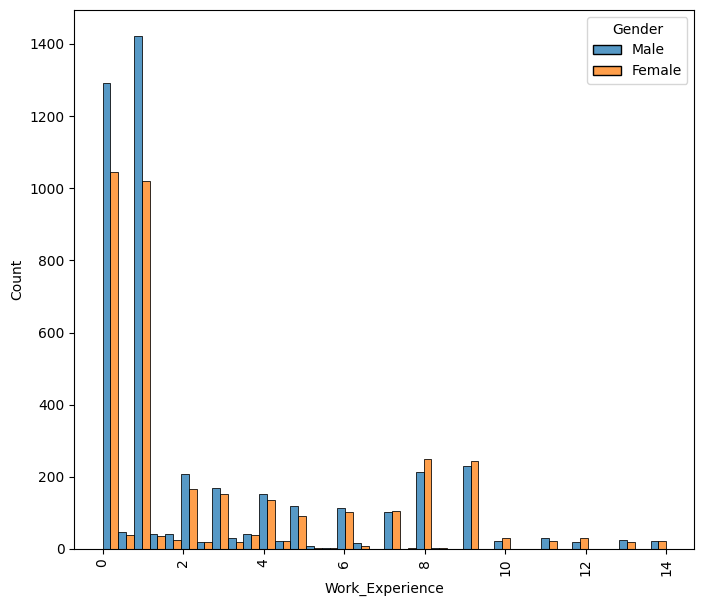

In [ ]:
#Distribution of Cat Variables w.r.t Gender
fig, axs = plt.subplots(1, 1, figsize=(8, 7))

axs=sns.histplot(df, x='Work_Experience',hue = 'Gender',multiple="dodge")
axs.tick_params(axis='x', rotation=90)

* Se observa que hay mayor concentracion de clientes con experiencia entre 0 a 1 año.
* A medida que incrementan los años de experiencia, las mujeres son las que resaltan.

In [ ]:
# Convert the categorical columns to Label encoded columns
from sklearn.preprocessing import  LabelEncoder
encoder = LabelEncoder()
df2 = df.copy(deep=True)
df2['Gender'] = encoder.fit_transform(df['Gender'])
df2['Marital_Status'] = encoder.fit_transform(df['Marital_Status'])
df2['Graduated'] = encoder.fit_transform(df['Graduated'])
df2['Profession'] = encoder.fit_transform(df['Profession'])
df2['Spending_Score'] = encoder.fit_transform(df['Spending_Score'])
df2['Customer_Category'] = encoder.fit_transform(df['Customer_Category'])
df2['Segmentation'] = encoder.fit_transform(df['Segmentation'])

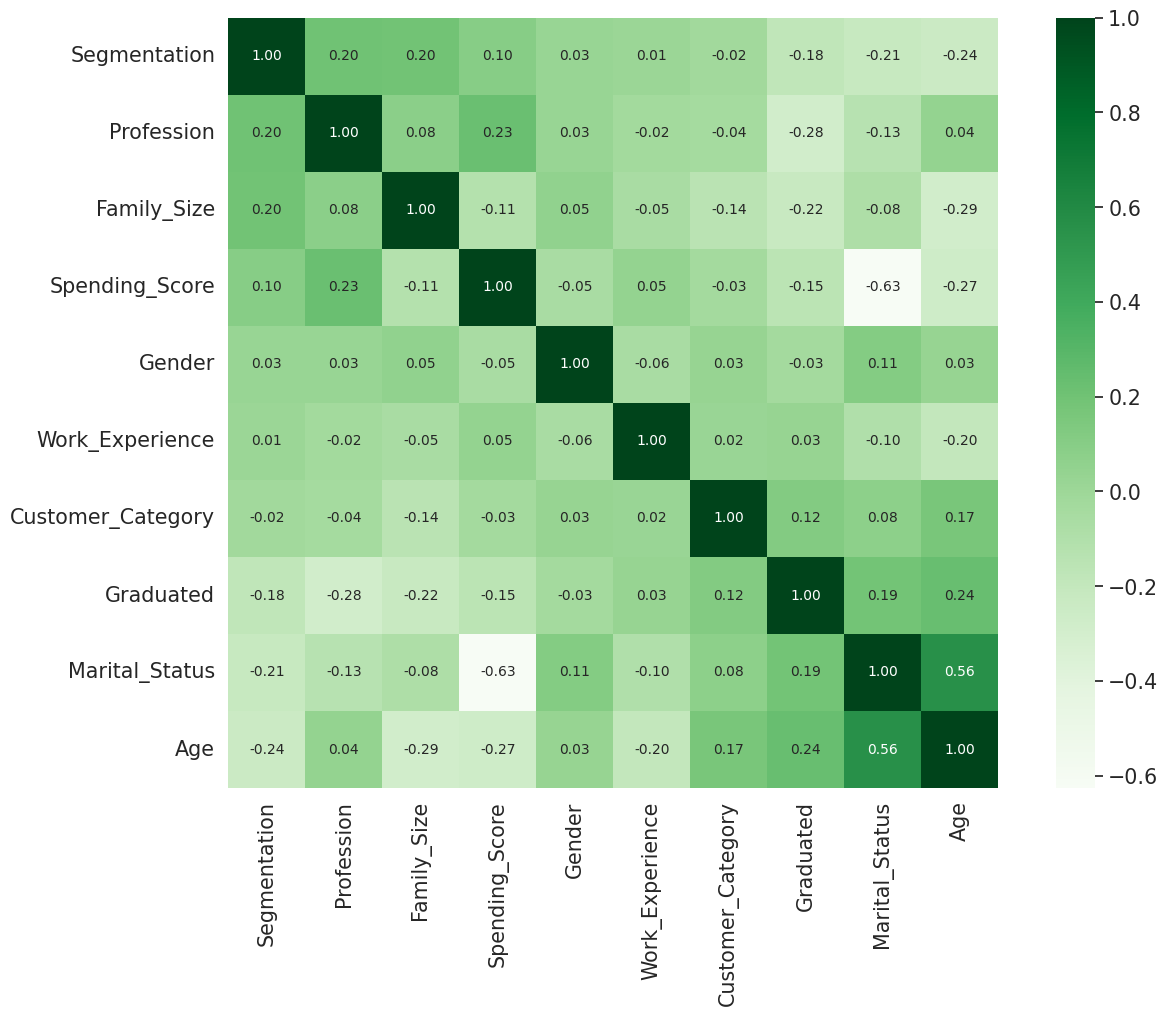

In [ ]:
# Create a correlation matrix
target = "Segmentation"

len_columns = 10

corr = df2.corr()

columnas = corr.nlargest(len_columns , target)[target].index

plt.figure(figsize=(15, 10))
cm = np.corrcoef(df2[columnas].values.T)
sns.set(font_scale=1.35)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=columnas.values, xticklabels=columnas.values,cmap="Greens")

plt.show()